# Segmentation

In [52]:
# general imports:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# my imports (reload all modules):

from data.dataset import load_data_deep_crack
from models.unet_resnet34 import UNetResNet34
from models.unet_swin import UNetSwin
from models.unet import UNet
from training.metrics import DiceLoss
from training.train import train
from utils import save_model_files
from utils import log_training_result


import data.dataset
import models.unet_resnet34
import models.unet_swin
import models.unet
import training.metrics
import training.train
import utils
importlib.reload(data.dataset)
importlib.reload(models.unet_resnet34)
importlib.reload(models.unet_swin)
importlib.reload(models.unet)
importlib.reload(training.metrics)
importlib.reload(training.train)
importlib.reload(utils)

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], batch_size=4)

Number of visible CUDA devices: 1
This gives us 240 train and 60 validation samples.


## Run the model

In [53]:
model = UNet(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 16,
                depth=5)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 1e-3)

dice_idcs = []
epoch_dice_idcs = []
val_dice_idcs = []
train_loss = []
val_loss = []
epoch_durations = []
best_model_wts = {}

In [54]:
train(model, loss, optimizer, train_dl, val_dl, num_epochs = 100, accum_scale = 4, dice_idcs = dice_idcs, epoch_dice_idcs = epoch_dice_idcs, val_dice_idcs = val_dice_idcs, best_model_wts = best_model_wts, train_loss=train_loss, val_loss=val_loss, epoch_durations=epoch_durations, save_path='../saved_models/test/', n_epoch_save=3)

In train() the selected device is: cuda
-29.69912624359131
Train loss:  0.8838273038466772
Epoch  1 . finished.
Validation loss:  0.864993425210317
Epoch 1/100 completed in 32.10 seconds
-29.25258445739746
Train loss:  0.8308909624814987
Epoch  2 . finished.
Validation loss:  0.8076748768488566
Epoch 2/100 completed in 31.69 seconds
-29.427030563354492
Train loss:  0.7636309405167897
Epoch  3 . finished.
Validation loss:  0.7860453406969706
save files
Epoch 3/100 completed in 32.03 seconds
-29.390013217926025
Train loss:  0.6423833966255188
Epoch  4 . finished.
Validation loss:  0.5672582983970642
Epoch 4/100 completed in 31.85 seconds


KeyboardInterrupt: 

In [10]:
log_training_result('../saved_models/training_log_2.csv', {
    "timestamp": pd.Timestamp.now(),
    "weights_file": "unet_5_2/",
    "epochs": 100,
    "learning_rate": 0.001,
    "batch_size": 4,
    "accum_scale": 4,
    "depth": 5,
    "base_channel_size": 16,    
    "comment": "Continue of uet_5_2",
    "augmentation": "rotate+randomCrop"
})

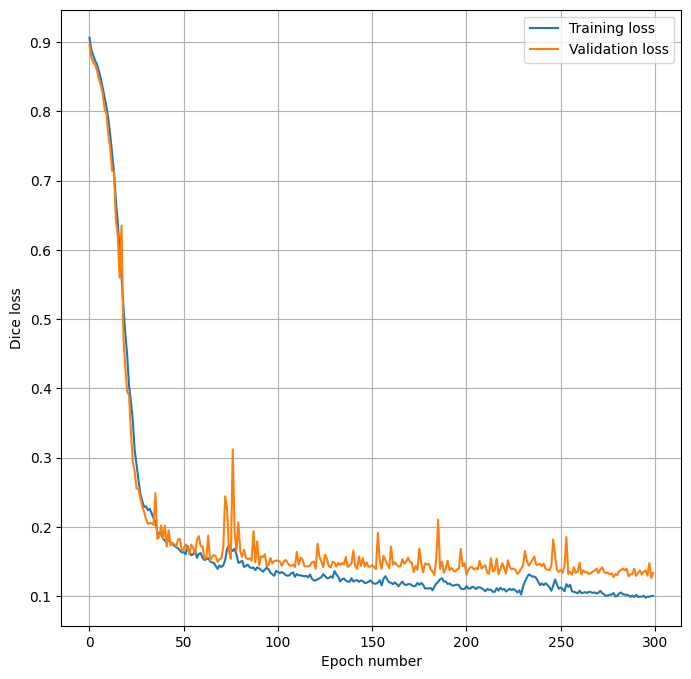

In [11]:
plt.figure(figsize = (8, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()